# Dataframes

In [18]:
import pandas as pd

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Winter_medals2022-11-03.csv")

In [22]:
df

,Country,Year,Gold,Silver,Bronze,Total,Country Code,Population
0,Australia,1994,0,0,1,1,AUS,17855000
1,Australia,1998,0,0,1,1,AUS,18711000
2,Australia,2002,2,0,0,2,AUS,19651400
3,Australia,2006,1,0,1,2,AUS,20697900
4,Australia,2010,2,1,0,3,AUS,22031750
...,...,...,...,...,...,...,...,...
268,United States,2018,9,8,6,23,USA,326687501
269,United States,2018,9,8,6,23,USA,327485273
270,United States,2022,8,10,7,25,USA,336630109
271,Uzbekistan,1994,1,0,0,1,UZB,22377000


# Select

In [25]:
relevant_df = df[["Country", "Gold", "Silver", "Bronze"]]
relevant_df

,Country,Gold,Silver,Bronze
0,Australia,0,0,1
1,Australia,0,0,1
2,Australia,2,0,0
3,Australia,1,0,1
4,Australia,2,1,0
...,...,...,...,...
268,United States,9,8,6
269,United States,9,8,6
270,United States,8,10,7
271,Uzbekistan,1,0,0


In [43]:
grouped_df = relevant_df.groupby ("Country").sum()

In [45]:
grouped_df["Total"] = grouped_df.sum(axis=1)

In [49]:
grouped_df.head(9)

,Gold,Silver,Bronze,Total
Country,,,,
Australia,6,9,7,22
Austria,51,58,67,176
Belarus,10,8,5,23
Belgium,1,2,2,5
Bulgaria,1,2,2,5
Canada,75,70,71,216
China,23,38,25,86
Croatia,4,6,1,11
Czech Republic,12,13,16,41


# Sort

In [54]:
sorted_df = grouped_df.sort_values("Total", ascending=False)
sorted_df

,Gold,Silver,Bronze,Total
Country,,,,
Germany,123,117,75,315
Norway,108,93,83,284
United States,82,85,71,238
Canada,75,70,71,216
Russia,57,63,67,187
Austria,51,58,67,176
Netherlands,51,40,41,132
Switzerland,49,33,41,123
Italy,33,36,54,123


# FILTER

In [66]:
## Get countries with more than 10 gold medals and 30 silver medals
## & as and, | as or, ~ as not.
grouped_df.loc[(grouped_df["Gold"]>10) & (grouped_df["Silver"]>=30)].sort_values("Total", ascending=False)

,Gold,Silver,Bronze,Total
Country,,,,
Germany,123,117,75,315
Norway,108,93,83,284
United States,82,85,71,238
Canada,75,70,71,216
Russia,57,63,67,187
Austria,51,58,67,176
Netherlands,51,40,41,132
Italy,33,36,54,123
Switzerland,49,33,41,123


# Visualising Data & Plotting

In [69]:
import matplotlib.pyplot as plt

## Simple line chart

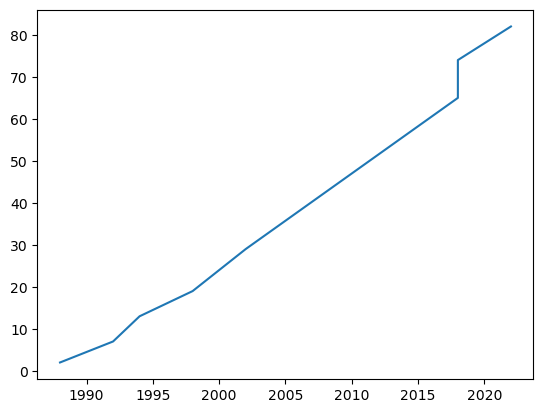

In [72]:
us_medals = df.loc[df["Country"] == "United States"]

x = us_medals["Year"]
y = us_medals["Gold"].cumsum()

plt.plot(x,y)

<Axes: xlabel='Year'>

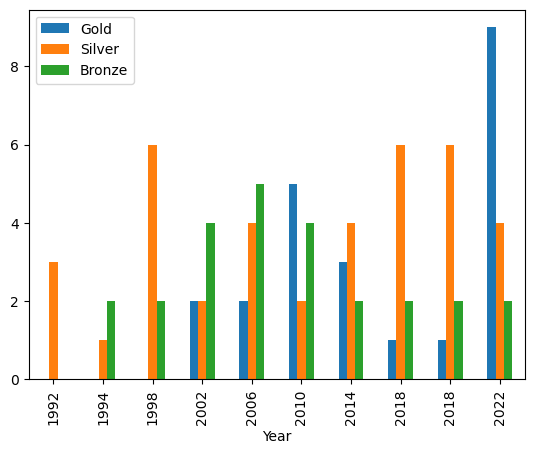

In [74]:
country = "China"
df \
    .loc[df["Country"] == country] \
    [["Year", "Gold", "Silver", "Bronze"]] \
    .set_index("Year") \
    .plot.bar()

Text(0.5, 0, 'x')

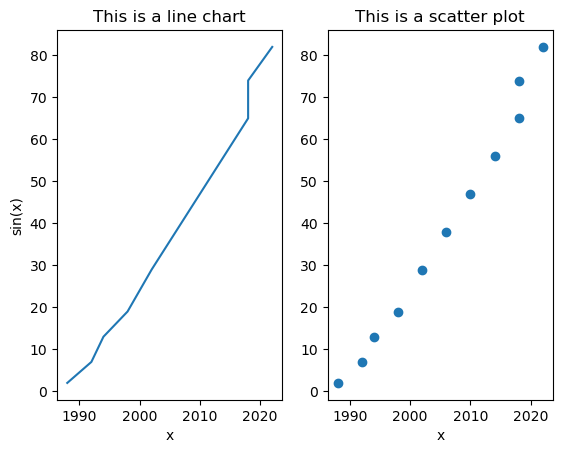

In [76]:
fig, ax = plt.subplots(1,2)

ax[0].plot(x,y)
ax[0].set_title("This is a line chart")
ax[0].set_xlabel("x")
ax[0].set_ylabel("sin(x)")

ax[1].scatter(x,y)
ax[1].set_title("This is a scatter plot")
ax[1].set_xlabel("x")

<Axes: xlabel='Country'>

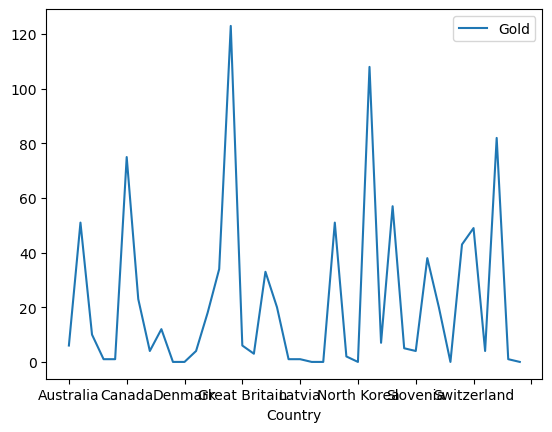

In [92]:
df\
[["Country", "Gold"]]\
.groupby("Country")\
.sum() \
.plot()

<Axes: xlabel='Country'>

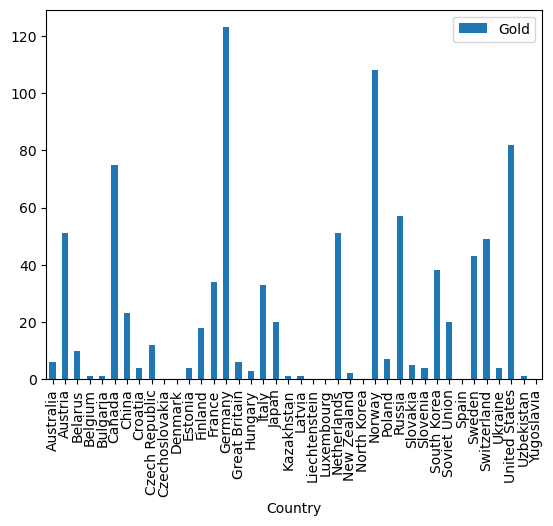

In [94]:
df\
[["Country", "Gold"]]\
.groupby("Country")\
.sum() \
.plot.bar()

<Axes: xlabel='Country'>

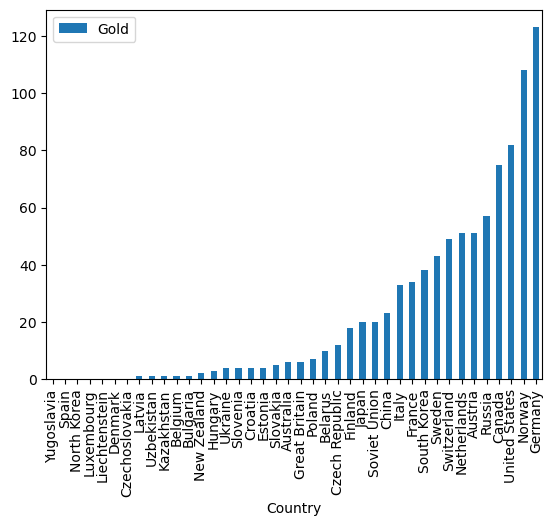

In [102]:
df\
[["Country", "Gold"]]\
.groupby("Country")\
.sum() \
.sort_values("Gold") \
.plot.bar()